In [5]:
import numpy as np
import cv2 as cv
from scipy.cluster.vq import vq
import matplotlib.pyplot as plt

In [6]:
# default number of clases
K_CLASSES = 2
# default number of iterations
ITER_MAX = 5000


def initial_clusters(img_flat, k, method="random"):
    methods_availables = ["linspace", "random"]

    assert method in methods_availables, "ERROR: method %s is no valid." \
                                         "Methods availables %s" \
                                         % (method, methods_availables)
    if method == "linspace":
        max, min = img_flat.max(), img_flat.min()
        centers = np.linspace(min, max, k)
    elif method == "random":
        start, end = 0, img_flat.size
        indices = np.random.randint(start, end, k)
        centers = img_flat.take(indices)

    return centers


def update_centers(img_flat, img_class, centers):
    """Update the cluster center, computing the mean of all cluster members.

    """
    axis = 0
    n_clusters = centers.shape[0]
    for cluster in range(n_clusters):
        condition = np.equal(img_class, cluster)
        members = np.compress(condition, img_flat, axis)
        if members.shape[0] > 0:
            centers[cluster] = np.mean(members, axis)

    return centers


def converged_clusters(centers, last_centers, iter):
    """ Stop algorithm if there is no change in the clusters values between each
    iteration.

    Returns:
            - True if should stop, otherwise False.
    """
    return np.array_equiv(centers, last_centers)


def kmeans_classification(img, k=K_CLASSES, iter_max=ITER_MAX):
    N, M = img.shape
    img_flat = img.flatten()

    centers = initial_clusters(img_flat, k, "linspace")

    for iter in range(0, iter_max):
        img_class, distances = vq(img_flat, centers)

        last_centers = centers.copy()
        centers = update_centers(img_flat, img_class, centers)

        if converged_clusters(centers, last_centers, iter):
            break
    
    print("Used {} classes.".format(k))
    print("Number of Iterations done: {}".format(iter + 1))

    return img_class.reshape(N, M)

Used 2 classes.
Number of Iterations done: 6
Used 2 classes.
Number of Iterations done: 5


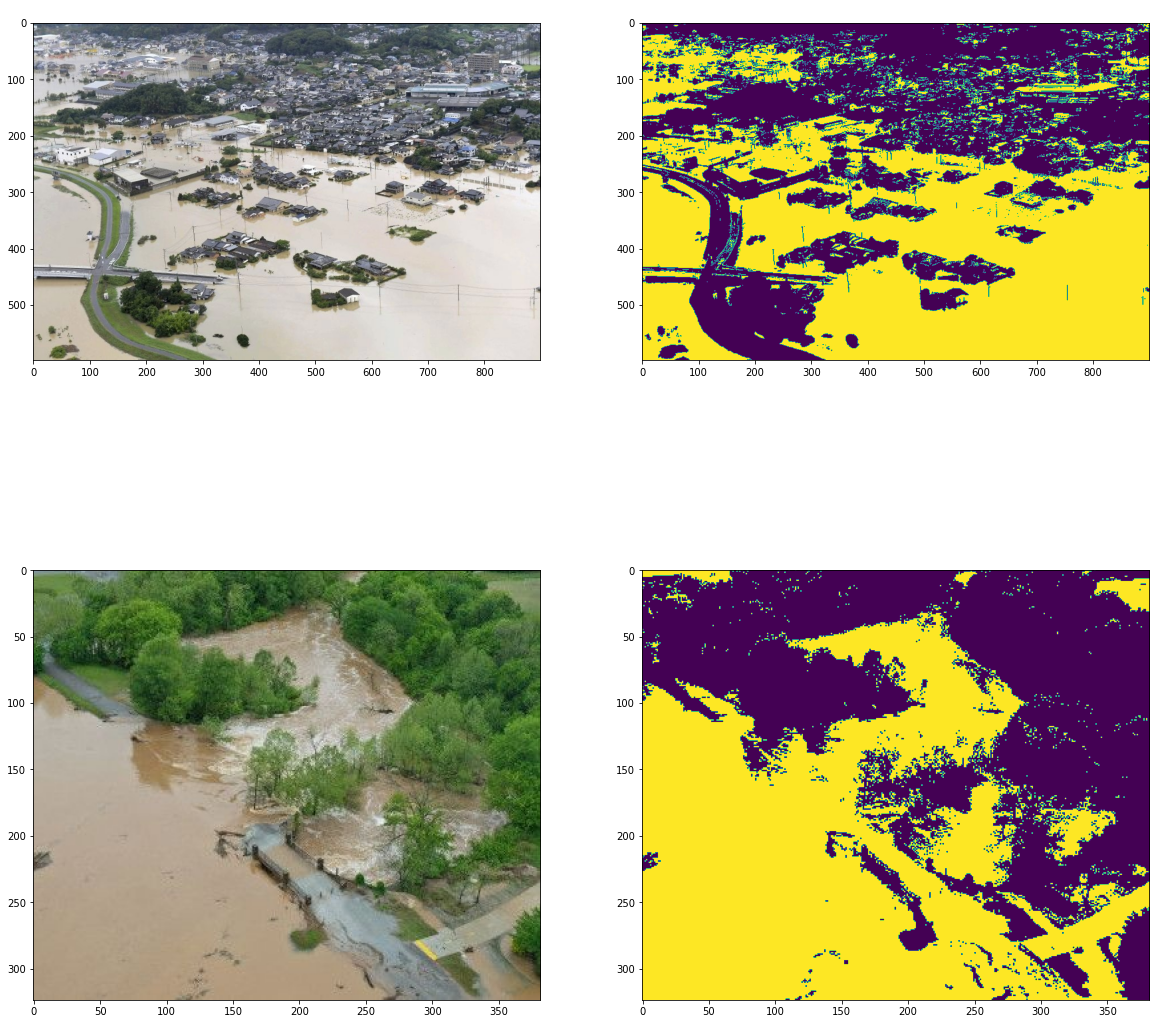

In [9]:
img_path1 = '../dataset/flooded/18.jpg'
img1 = cv.imread(img_path1)
original_image1 = img1.copy()
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
class_image1 = kmeans_classification(img1)

img_path2 = '../dataset/flooded/17.jpg'
img2 = cv.imread(img_path2)
original_image2 = img2.copy()
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
class_image2 = kmeans_classification(img2)

# Display the images
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(original_image1)
plt.title('Original Image', color='white')
plt.subplot(222)
plt.imshow(class_image1)
plt.title('Segmented Image', color='white')
plt.subplot(223)
plt.imshow(original_image2)
plt.title('Original Image', color='white')
plt.subplot(224)
plt.imshow(class_image2)
plt.title('Segmented Image', color='white')
plt.show()
